In [ ]:
׳

#  **What is the popularity of genres and how does Tempo and Valence attributes affect this popularity?**

This business question will be analyzed through exploratory data analysis using a dataset.csv file (as detailed in section 1 - Introduction).

# **Team members**

# Ortal Lasry

# Dror Ettlinger Levy

## **Table of contents**

1. Introduction
2. Data Loading and Initial Inspection
3. Data Cleaning
4. Visualization Before and After Cleaning
5. Correlation Analysis
6. Detailed Analysis on Popularity, Tempo, and Valence
7. Summary and Conclusions

# 1.  **Introduction**


**Data set** used for analysis was found on Kaggle -
https://www.kaggle.com/datasets/priyamchoksi/spotify-dataset-114k-songs

# **Spotify Tracks Dataset Description:**

This dataset contains information on Spotify tracks spanning 125 different genres. Each track is described by various audio features and metadata. The dataset can be utilized for:

Building recommendation systems based on user preferences or inputs.
Classification tasks based on audio features and genre categorization.

# **Columns Description:**

**track_id:** The unique Spotify ID for each track.

**artists:** Names of the artists who performed the track, separated by ';'.

**album_name:** The name of the album in which the track appears.

**track_name:** The title of the track.

**popularity:** A value between 0 and 100, indicating the track's popularity based on recent plays.

**duration_ms:** The length of the track in milliseconds.

**explicit:** Boolean indicating whether the track contains explicit content.

**danceability:** Describes how suitable a track is for dancing (0.0 = least danceable, 1.0 = most danceable).

**energy:** Represents the intensity and activity of a track (0.0 = low energy, 1.0 = high energy).

**key:** The musical key of the track mapped using standard Pitch Class notation.

**loudness:** Overall loudness of the track in decibels (dB).

**mode:** Indicates the modality (major or minor) of the track.

**speechiness:** Detects the presence of spoken words in the track.

**acousticness:** Confidence measure of whether the track is acoustic (0.0 = not acoustic, 1.0 = highly acoustic).

**instrumentalness:** Predicts whether a track contains vocals (0.0 = contains vocals, 1.0 = instrumental).

**liveness:** Detects the presence of an audience in the recording (0.0 = studio recording, 1.0 = live performance).

**valence:** Measures the musical positiveness conveyed by a track (0.0 = negative, 1.0 = positive).

**tempo:** Estimated tempo of the track in beats per minute (BPM).

**time_signature:** Estimated time signature of the track (3 to 7).

Each track is associated with a specific genre labeled under **track_genre**.




# 2. **Data imports and initial inspection**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import regex as re
import seaborn as sns

#seaborn was used for the corr plot in the correlation section.
#regex was used for unicode - all languages notes



df = pd.read_csv("dataset.csv",
                   index_col='Unnamed: 0')

# Display the first few rows of the original dataset
print("First few rows of the original dataset:")
print(df.head())

print("~"*100)
# Data types in the dataset
print(df.info())

print("~"*100)
# Check for Missing Values
print("\nMissing values in the dataset:")
print(df.isna().sum())
print("According to the info() we see there is 1 missing value in columns: artists, album_name, track_name. This needs to be handled before carrying on.")

print("~"*100)
print("Introducing the boundaries for each relevant column:")
print("popularity boundaries:")
print(df['popularity'].max(), "- high, popular")
print(df['popularity'].min()," - low, not popular")
print("tempo boundaries:")
print(df['tempo'].max(),"- high, fast bit")
print(df['tempo'].min()," - low, slow bit")
print("valence boundaries:")
print(df['valence'].max()," - high, positive effect")
print(df['valence'].min()," - low, negative effect")

print("~"*100)
# Convert the 'popularity' column to numeric type because of NaN types recognized in this column
df['popularity'] = pd.to_numeric(df['popularity'])

# Sort the dataframe by popularity in descending order
df_sorted = df.sort_values('popularity', ascending=False)

print("This is the sorted dataframe by popularity (Unholy by Kim Petras is the most popular song):")
df_sorted.head(10)
print(df_sorted.head(10))

print("~"*100)
# Check for missing values in the 'popularity' column
print("Missing values in popularity column:", df['popularity'].isnull().sum())

print("there are no missing values, the column had an issue with sorting (the max=100 didn't show on the top of the head) so i used to_numeric in order to sort it correctly.")
print("i don't know exactly why it happened because it shows no missing values, meaning everything in the column was totally numeric to begin with.")

print("~"*100)
########
# Specify the column you are interested in
column_name = 'artists'

# Get the index of rows where the column has missing values
missing_value_indices = df[df[column_name].isnull()].index

# Convert to a list for easier use or display
missing_value_indices_list = missing_value_indices.tolist()

print(f"Indices with missing values in column '{column_name}':")
print(missing_value_indices_list)

#########
# Specify the column you are interested in
column_name = 'track_name'

# Get the index of rows where the column has missing values
missing_value_indices = df[df[column_name].isnull()].index

# Convert to a list for easier use or display
missing_value_indices_list = missing_value_indices.tolist()

print(f"Indices with missing values in column '{column_name}':")
print(missing_value_indices_list)

#########

def has_a(value):
    #raise Exception(value) #try activating this and see what happens
    if str(value).isalpha():
        return str(value)[0]
    return ""

df.apply(has_a, axis=0)#these are the columns in the dataset

df.apply(has_a, axis=1) #these are the rows in the index column. it is an organized column.


# Check for missing values by column
missing_values = df.isnull().sum()

# Print columns with missing values
missing_columns = missing_values[missing_values > 0]
print("Columns with missing values:\n", missing_columns)

# Specify the columns to remove in a list
columns_to_remove = ['explicit', 'mode', 'speechiness',
                     'acousticness', 'instrumentalness', 'liveness', 'time_signature']

# Remove the columns
df = df.drop(columns_to_remove, axis=1)

#########
# Specify the column you are interested in
column_name = 'album_name'

# Get the index of rows where the column has missing values
missing_value_indices = df[df[column_name].isnull()].index

# Convert to a list for easier use or display
missing_value_indices_list = missing_value_indices.tolist()

print(f"Indices with missing values in column '{column_name}':")
print(missing_value_indices_list)
########
print("The missing indices will be removed during the cleanup section.")

# Convert the 'tempo' column to numeric type
df['tempo'] = pd.to_numeric(df['tempo'])

# Convert the 'valence' column to numeric type
df['valence'] = pd.to_numeric(df['valence'])






First few rows of the original dataset:
                 track_id                 artists  \
0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love   

# 3. **Data Cleaning**

First few rows of the cleaned dataset:
                 track_id                 artists  \
0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  danceability  energy  \
0                      Comedy          73       230666         0.676  0.4610   
1            Ghost - Acoustic          55       149610         0.420  0.1660   
2              To Begin Again          57       210826         0.

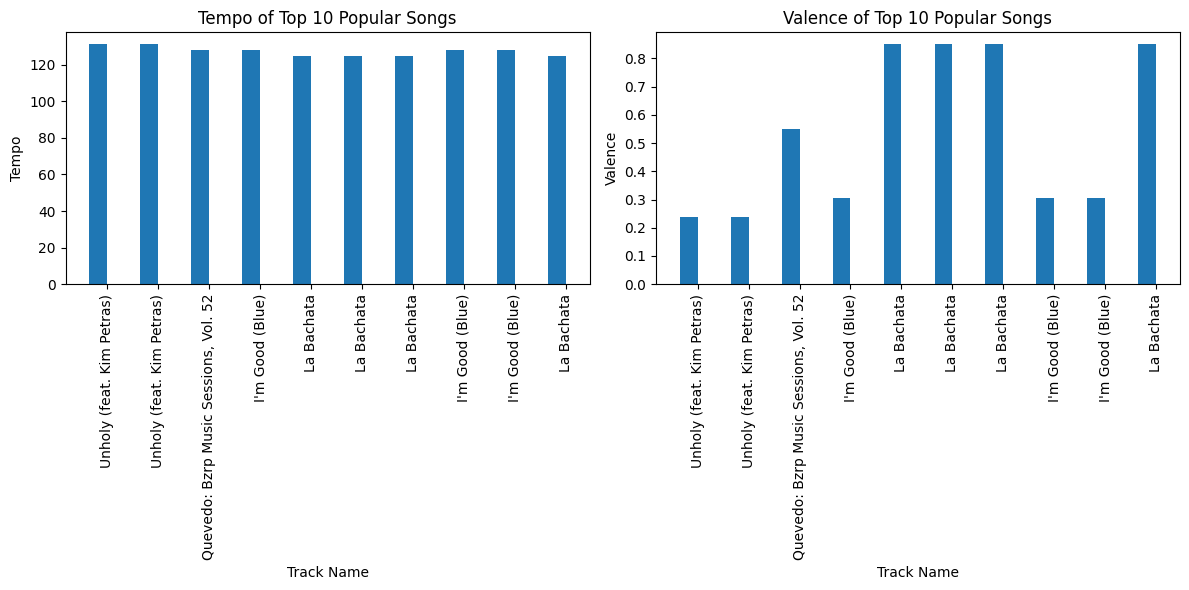

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
this wasn't good enough because you can see there are duplicate songs. so the next step is to agregate these duplicates and again visualize the top 10 popular songs.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Cleaned_dataset after cleanup of jibrish and missing indices:
    
                      track_id                 artists  \
0       5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1       4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2       1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3       6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4       5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...              

In [ ]:
# Display the first few rows of the cleaned dataset
print("First few rows of the cleaned dataset:")
print(df.head())

# Sort the dataframe by popularity in descending order
df_sorted = df.sort_values('popularity', ascending=False)

####creating bar charts of 10 popular songs by tempo and by valence#####

print("~"*200)
print("Here are 2 charts to visualize why cleanup must continue - there are duplicates of the same track_name:")

# Select the top 10 tracks
top_10_tracks = df_sorted.head(10)

# Adjust bar width and add offset
bar_width = 0.35
offset = np.arange(len(top_10_tracks))

# Create separate charts for tempo and valence with adjusted bar width and offset
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(offset, top_10_tracks['tempo'], bar_width, label='Tempo')
plt.xlabel('Track Name')
plt.ylabel('Tempo')
plt.title('Tempo of Top 10 Popular Songs')
plt.xticks(offset + bar_width / 2, top_10_tracks['track_name'], rotation=90)

plt.subplot(1, 2, 2)
plt.bar(offset, top_10_tracks['valence'], bar_width, label='Valence')
plt.xlabel('Track Name')
plt.ylabel('Valence')
plt.title('Valence of Top 10 Popular Songs')
plt.xticks(offset + bar_width / 2, top_10_tracks['track_name'], rotation=90)

plt.tight_layout()
plt.show()

print("~"*200)
print("this wasn't good enough because you can see there are duplicate songs. so the next step is to agregate these duplicates and again visualize the top 10 popular songs.")
print("~"*200)

#####cleanup of jibrish and missing indices album_name column######

# Remove rows with missing data
df_cleaned = df.dropna()

# Specify the column you are interested in
column_name = 'album_name'

# Use a regular expression to check for at least one alphabetic character
df_cleaned = df_cleaned[df_cleaned[column_name].apply(lambda x: bool(re.search('[a-zA-Z]', str(x))))]

# Function to check if a string contains only numbers
def is_numeric_string(s):
    return str(s).isdigit()

# Function to check if a string contains at least one alphabetic character from any language
def has_alphabetic_char(s):
    return bool(re.search(r'\p{L}', str(s)))

# Identify rows where the 'album_name' contains only numbers
numeric_rows = df[df['album_name'].apply(is_numeric_string)]

# Ensure the rows are unique
unique_numeric_rows = numeric_rows.drop_duplicates()

# Identify rows where the 'album_name' contains at least one alphabetic character from any language
alphabetic_rows = df[df['album_name'].apply(has_alphabetic_char)]

# Ensure these rows are unique
unique_alphabetic_rows = alphabetic_rows.drop_duplicates()

# Ensure these rows are not already present in df_cleaned
new_numeric_rows = unique_numeric_rows[~unique_numeric_rows.isin(df_cleaned)].dropna()
new_alphabetic_rows = unique_alphabetic_rows[~unique_alphabetic_rows.isin(df_cleaned)].dropna()

# Add these unique rows back to the cleaned DataFrame
df_cleaned = pd.concat([df_cleaned, new_numeric_rows, new_alphabetic_rows])

# Remove any duplicates that might have been introduced during concatenation
df_cleaned = df_cleaned.drop_duplicates()

# Save the cleaned dataset
df_cleaned.to_csv('cleaned_dataset.csv', index=False)



#####cleanup of jibrish and missing indices for artists column######


# Specify the column you are interested in
column_name = 'artists'

# Use a regular expression to check for at least one alphabetic character
df_cleaned = df_cleaned[df_cleaned[column_name].apply(lambda x: bool(re.search('[a-zA-Z]', str(x))))]

# Function to check if a string contains only numbers
def is_numeric_string(s):
    return str(s).isdigit()

# Function to check if a string contains at least one alphabetic character from any language
def has_alphabetic_char(s):
    return bool(re.search(r'\p{L}', str(s)))

# Identify rows where the 'artists' contains only numbers
numeric_rows = df[df['artists'].apply(is_numeric_string)]

# Ensure the rows are unique
unique_numeric_rows = numeric_rows.drop_duplicates()

# Identify rows where the 'artists' contains at least one alphabetic character from any language
alphabetic_rows = df[df['artists'].apply(has_alphabetic_char)]

# Ensure these rows are unique
unique_alphabetic_rows = alphabetic_rows.drop_duplicates()

# Ensure these rows are not already present in df_cleaned
new_numeric_rows = unique_numeric_rows[~unique_numeric_rows.isin(df_cleaned)].dropna()
new_alphabetic_rows = unique_alphabetic_rows[~unique_alphabetic_rows.isin(df_cleaned)].dropna()

# Add these unique rows back to the cleaned DataFrame
df_cleaned = pd.concat([df_cleaned, new_numeric_rows, new_alphabetic_rows])

# Remove any duplicates that might have been introduced during concatenation
df_cleaned = df_cleaned.drop_duplicates()

# Save the cleaned dataset
df_cleaned.to_csv('cleaned_dataset.csv', index=False)

# Remove rows with missing data
df_cleaned = df.dropna()

#####cleanup of jibrish and missing indices for track_name column######

# Specify the column you are interested in
column_name = 'track_name'

# Use a regular expression to check for at least one alphabetic character
df_cleaned = df_cleaned[df_cleaned[column_name].apply(lambda x: bool(re.search('[a-zA-Z]', str(x))))]

# Function to check if a string contains only numbers
def is_numeric_string(s):
    return str(s).isdigit()

# Function to check if a string contains at least one alphabetic character from any language
def has_alphabetic_char(s):
    return bool(re.search(r'\p{L}', str(s)))

# Identify rows where the 'track_name' contains only numbers
numeric_rows = df[df['track_name'].apply(is_numeric_string)]

# Ensure the rows are unique
unique_numeric_rows = numeric_rows.drop_duplicates()

# Identify rows where the 'track_name' contains at least one alphabetic character from any language
alphabetic_rows = df[df['track_name'].apply(has_alphabetic_char)]

# Ensure these rows are unique
unique_alphabetic_rows = alphabetic_rows.drop_duplicates()

# Ensure these rows are not already present in df_cleaned
new_numeric_rows = unique_numeric_rows[~unique_numeric_rows.isin(df_cleaned)].dropna()
new_alphabetic_rows = unique_alphabetic_rows[~unique_alphabetic_rows.isin(df_cleaned)].dropna()

# Add these unique rows back to the cleaned DataFrame
df_cleaned = pd.concat([df_cleaned, new_numeric_rows, new_alphabetic_rows])

# Remove any duplicates that might have been introduced during concatenation
df_cleaned = df_cleaned.drop_duplicates()

# Save the cleaned dataset
df_cleaned.to_csv('cleaned_dataset.csv', index=False)


###### Verify the changes######
print("Cleaned_dataset after cleanup of jibrish and missing indices:")
print("    ")
print(df_cleaned)

print("~"*200)
print("Proving the missing indices have been removed:")
single_row = df_cleaned.loc[65899:65901, :]
print(type(single_row))
print(single_row)

print("~"*200)
print("The first cleanup of the dataframe:")
print(df_cleaned.info())

#######comparing between the original dataset and the first cleaned dataset########

df_original_dataset = pd.read_csv("dataset.csv",
                   index_col='Unnamed: 0')

# Compare the shape of the datasets
print("comparing between the data shapes before and after cleanup:")
print("Original dataset shape:", df_original_dataset.shape)
print("Cleaned dataset shape:", df_cleaned.shape)

print("~"*200)

# Check the distribution of a key feature (e.g., track_genre)

original_genre_distribution = df_original_dataset['track_genre'].value_counts(normalize=True)
cleaned_genre_distribution = df_cleaned['track_genre'].value_counts(normalize=True)

print("~"*200)
print("Original genre distribution:")
print(original_genre_distribution)

print("Cleaned genre distribution:")
print(cleaned_genre_distribution)

# Compare the mean popularity before and after cleaning

original_mean_popularity = df_original_dataset['popularity'].mean()
cleaned_mean_popularity = df_cleaned['popularity'].mean()

print("~"*200)
print("comparing between the mean popularity before and after cleanup:")
print("Original mean popularity:", original_mean_popularity)
print("Cleaned mean popularity:", cleaned_mean_popularity)

print("~"*200)
print("You can see there is no big change in mean popularity before and after cleanup, meaning the cleanup didn't impact the data.")

######filtering the data from unwanted duplicates######

# Group by 'track_name'
grouped = df_cleaned.groupby('track_name')

# Filter groups where all entries have the same 'artists' string
filtered_groups = grouped.filter(lambda x: len(x['artists'].unique()) == 1)

df = pd.read_csv("dataset.csv", index_col='Unnamed: 0')
print(df['duration_ms'])

# Convert the 'duration_ms' column to numeric type
df['duration_ms'] = pd.to_numeric(df['duration_ms'])

# Perform aggregation: mean popularity and mean duration
aggregated = filtered_groups.groupby('track_name').agg({
    'popularity': 'mean',
    'duration_ms': 'mean'
}).reset_index()

# Count the number of songs including duplicate songs with same relevant data after agregation of groupby
#This also equals the length of rows in cleaned_dataset.csv
same_name_count = df_cleaned['track_name'].value_counts()

# Count the number of songs with the same name and same artists
same_name_artist_count = df_cleaned.groupby(['track_name', 'artists']).size().reset_index(name='count')

# Save the aggregated DataFrame to a new CSV file
aggregated.to_csv('aggregated_dataset.csv', index=False)
print("~"*100)
print("This is the full aggregated data")
print(aggregated)
print("~"*100)
# Display the results
print("Number of songs with the same name:")
print(same_name_count[same_name_count > 1])  # Show only duplicates
print("~"*100)
print("\nNumber of songs with the same name and same artists:")
print(same_name_artist_count[same_name_artist_count['count'] > 1])  # Show only duplicates

#### Choose a track name (to demonstarte how duplicates of one track_name look like)
track_name_to_check = "La Bachata"
print("~"*100)
# Data before filtering and aggregation
original_data = df_cleaned[df_cleaned['track_name'] == track_name_to_check]
print("Original cleaned Data for a specific song - for demonstration of duplicates before filtering it:")
print(original_data)
print("~"*100)
# Data after filtering and aggregation
aggregated_data = aggregated[aggregated['track_name'] == track_name_to_check]
print("\nAggregated Data of the specific song selected for demonstraion after filtering duplicates:")
print(aggregated_data)

# Function to check for differences in specified columns
def check_differences(group, columns):
    for column in columns:
        if group[column].nunique() > 1:
            return True
    return False

# Columns to check for differences
columns_to_check = [ 'tempo', 'valence', 'popularity']

# Group by 'track_name' and check for differences
same_name_diff = df_cleaned.groupby('track_name').filter(lambda x: check_differences(x, columns_to_check))

# Group by 'track_name' and 'artists' and check for differences
same_name_artist_diff = df_cleaned.groupby(['track_name', 'artists']).filter(lambda x: check_differences(x, columns_to_check))
print("~"*100)
# Display results
print("Songs with the same name that have differences in 'tempo', 'valence', or 'popularity':")
print(same_name_diff[['track_name', 'artists', 'tempo', 'valence', 'popularity']].drop_duplicates())
print("~"*100)
print("\nSongs with the same name and same artists that have differences in 'tempo', 'valence', or 'popularity':")
print(same_name_artist_diff[['track_name', 'artists', 'tempo', 'valence', 'popularity']].drop_duplicates())

# Function to check if all rows have the same values for the specified columns
def check_all_same(group, columns):
    return group[columns].nunique().eq(1).all()

# Columns to check for equality
columns_to_check = ['tempo', 'valence', 'popularity']

# Identify rows to keep (for songs with same name and same artists with different values)
#This are rows with same track_name, meaning duplicates, but with different data, making them unique duplicates.
rows_to_keep = df_cleaned.groupby(['track_name', 'artists']).filter(
    lambda x: not check_all_same(x, columns_to_check)
)
print("~"*100)
# Display the resulting DataFrame
print("rows to keep and add to the cleaned dataset, to create final cleaned csv file:")
print(rows_to_keep)

# Save the resulting DataFrame to a new CSV file
rows_to_keep.to_csv('rows_to_keep_dataset.csv', index=False)

df_cleaned = df_cleaned.groupby('track_name').agg('first').reset_index()
print("~"*100)
# Display the resulting DataFrame
print("Cleaned_dataset after full agregation of duplicates (before filtering them):")
print(df_cleaned)

# Save again the cleaned dataset and now also filtered (after agregation by same track_name)
df_cleaned.to_csv('cleaned_dataset.csv', index=False)
print("~"*100)
print("Cleaned_dataset after full agregation of duplicates (afterrr filtering them):")
print(df_cleaned)
print("~"*100)

# Get unique track names in rows_to_keep
unique_track_names = rows_to_keep['track_name'].unique()

# Remove all rows with these track names from the original dataset
cleaned_df = df_cleaned[~df_cleaned['track_name'].isin(unique_track_names)]

# Append rows_to_keep to cleaned_df
final_df = pd.concat([cleaned_df, rows_to_keep])
print("~"*100)
# Display the final DataFrame
print("final cleaned dataset:")
print(final_df)

# Save the final DataFrame to a new CSV file
final_df.to_csv('final_clean_dataset.csv', index=False)

# **Summary explanation for cleanup -**

**1. Cleaned_dataset**

**1.1 Cleaning jibrish and missing indices -**

Only 0.46% of the data was removed in the first cleanup after removing jibrish (=could be wrong data) and missing data.

track_name, album_name and artists columns:  includes now only notes in english as well as notes in other languages and numbers (some songs have only numbers and unknown language).
The regex module is used instead of the re module to support Unicode property escapes, this helps tracking down the "other languages" notes.

**1.2 Cleaning all duplicates of track_name**
We've have realized there were many duplicates and so aggregation has been made on all duplicates.

**2. Filtering the duplicates and bringing back unique duplicates into a final_clean_dataset**

There are duplicate songs with different data (tempo, valence, popularity have been taken for this checkup) or same song name but different artist name.

This is why after aggregation of all duplicates, we needed to screen and filter between them while saving these unique duplicates into rows_to_keep_dataset ,so we can bring them back to the cleaned_dataset while creating a  final_clean_dataset (for better understanding).

This way we lose less data after filtering duplicates.
Duplicates must be removed (after filteration) for better improved and more organized data. This part of code cleanup was long but necessery.

**About the results -**
The numbers are all shown in the results and you can see why this was important, also for visualizing and analyzing the data.

Having too many duplicates make the analyze less coherent - for example in a bar chart songs will cover each other because of duplicates, and the full picture will not be precised.



# 4. **Visualization Before and After Cleaning**

<ipython-input-6-00a71932d728>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='popularity', y='track_genre', data=top_genres, palette='viridis')


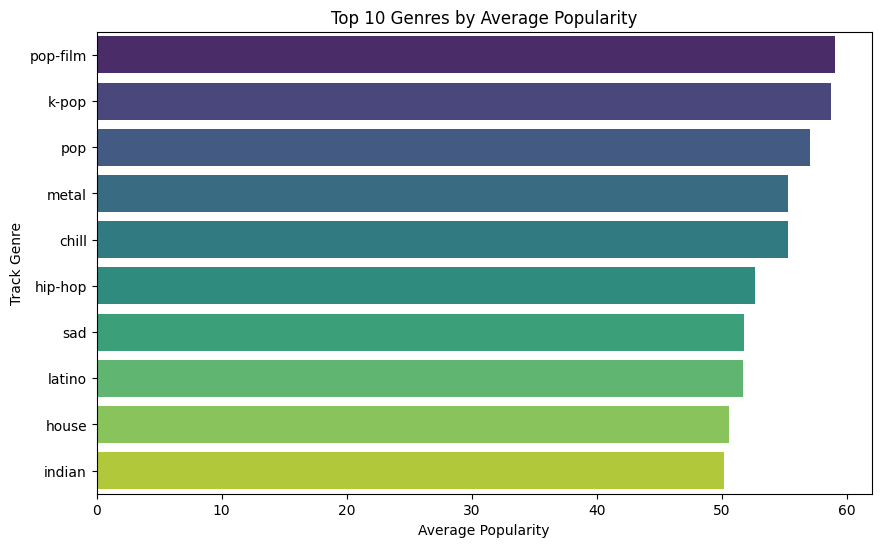

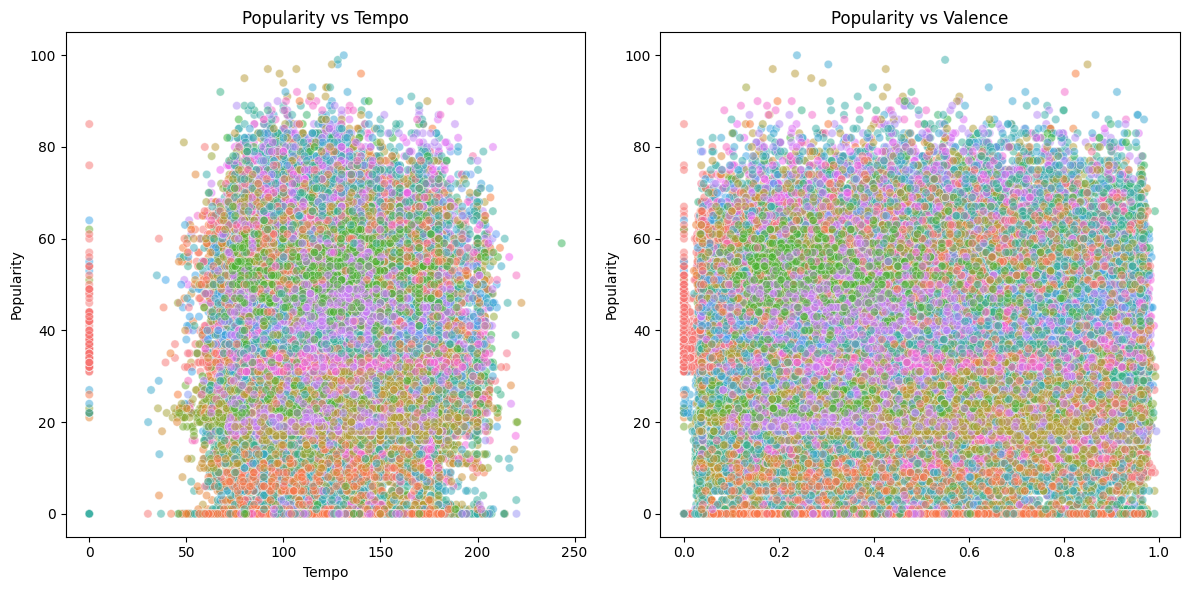

<ipython-input-6-00a71932d728>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='popularity', y='track_genre', data=top_high_tempo_valence_genres, palette='viridis')


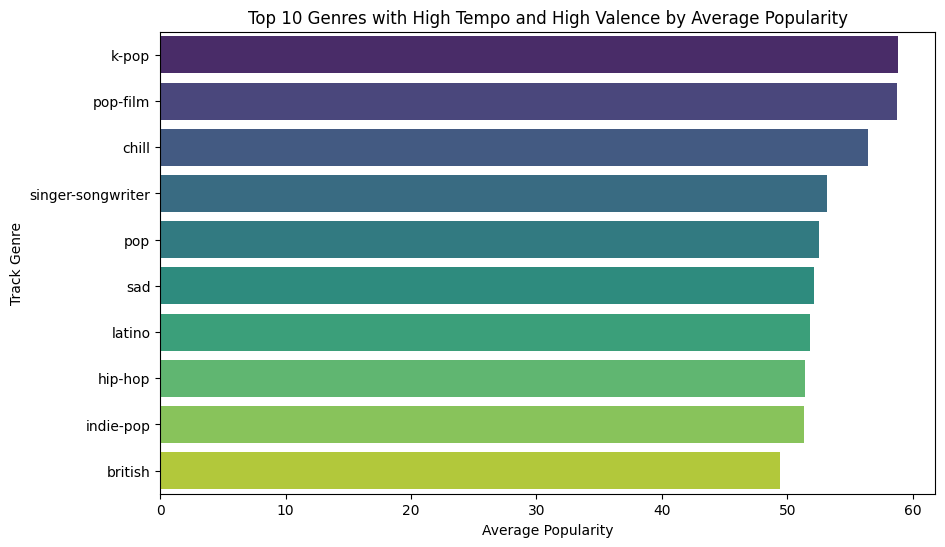

In [ ]:
# Aggregate data by genre
genre_popularity = df_cleaned.groupby('track_genre')['popularity'].mean().reset_index()

# Top 10 genres by average popularity
top_genres = genre_popularity.sort_values(by='popularity', ascending=False).head(10)

# Plotting top genres by average popularity
plt.figure(figsize=(10, 6))
sns.barplot(x='popularity', y='track_genre', data=top_genres, palette='viridis')
plt.title('Top 10 Genres by Average Popularity')
plt.xlabel('Average Popularity')
plt.ylabel('Track Genre')
plt.show()

# Scatter plot of popularity vs tempo and valence
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='tempo', y='popularity', hue='track_genre', data=df_cleaned, legend=False, alpha=0.5)
plt.title('Popularity vs Tempo')
plt.xlabel('Tempo')
plt.ylabel('Popularity')

plt.subplot(1, 2, 2)
sns.scatterplot(x='valence', y='popularity', hue='track_genre', data=df_cleaned, legend=False, alpha=0.5)
plt.title('Popularity vs Valence')
plt.xlabel('Valence')
plt.ylabel('Popularity')

plt.tight_layout()
plt.show()

# Analyze high tempo and high valence
high_tempo_valence = df_cleaned[(df_cleaned['tempo'] > df_cleaned['tempo'].median()) &
                                (df_cleaned['valence'] > df_cleaned['valence'].median())]

high_tempo_valence_popularity = high_tempo_valence.groupby('track_genre')['popularity'].mean().reset_index()

# Top 10 genres with high tempo and high valence by average popularity
top_high_tempo_valence_genres = high_tempo_valence_popularity.sort_values(by='popularity', ascending=False).head(10)

# Plotting top genres with high tempo and high valence by average popularity
plt.figure(figsize=(10, 6))
sns.barplot(x='popularity', y='track_genre', data=top_high_tempo_valence_genres, palette='viridis')
plt.title('Top 10 Genres with High Tempo and High Valence by Average Popularity')
plt.xlabel('Average Popularity')
plt.ylabel('Track Genre')
plt.show()




# 5. **Correlation Analysis**

              popularity  duration_ms  danceability    energy       key  \
popularity      1.000000    -0.016887      0.034076 -0.015141 -0.010084   
duration_ms    -0.016887     1.000000     -0.066551  0.058348  0.007667   
danceability    0.034076    -0.066551      1.000000  0.137529  0.037473   
energy         -0.015141     0.058348      0.137529  1.000000  0.052203   
key            -0.010084     0.007667      0.037473  0.052203  1.000000   
loudness        0.038897    -0.001760      0.273468  0.754891  0.041435   
valence        -0.022023    -0.144231      0.493500  0.256332  0.037287   
tempo           0.003604     0.025928     -0.041476  0.248706  0.011044   

              loudness   valence     tempo  
popularity    0.038897 -0.022023  0.003604  
duration_ms  -0.001760 -0.144231  0.025928  
danceability  0.273468  0.493500 -0.041476  
energy        0.754891  0.256332  0.248706  
key           0.041435  0.037287  0.011044  
loudness      1.000000  0.288038  0.218560  
valence  

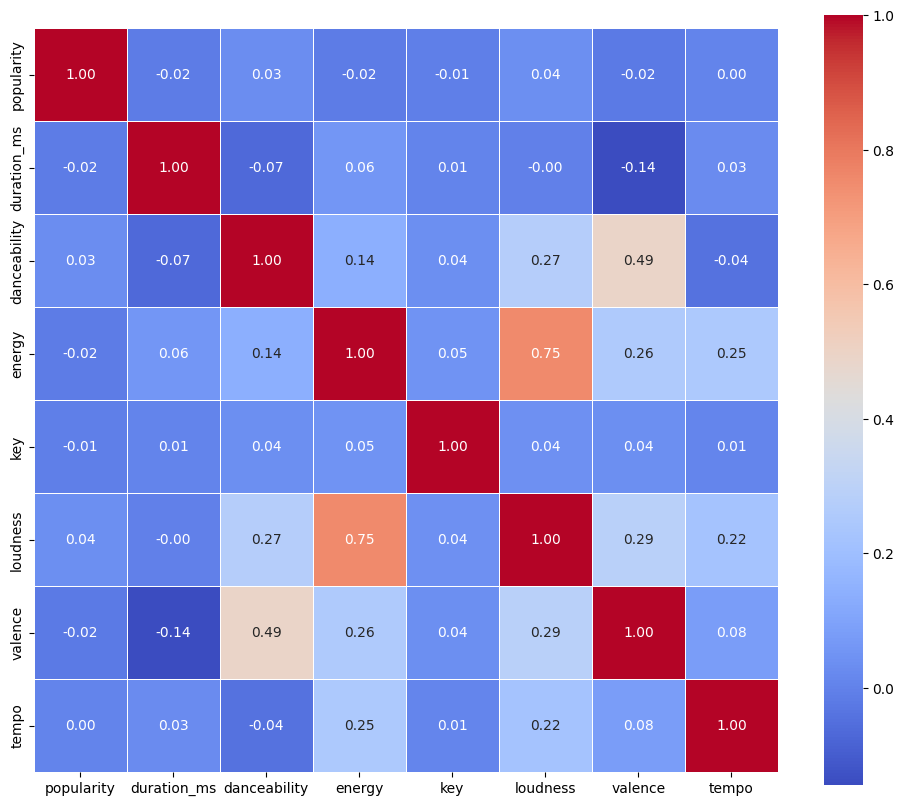

In [ ]:
# Select only numeric columns
numeric_df = final_df.select_dtypes(include=[float, int])

# Calculate the correlation table
correlation_table = numeric_df.corr()

# Display the correlation table
print(correlation_table)

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_table, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)

# Show the plot
plt.show()

**Conclustion for corr table:**

Tempo and Valence have a positive (0.08) correlation.

Tempo and popularity have a zero (0.00) correlation.

Valence and Popularity have a negative (-0.02) correlation.

**Meaning:** A song has more positive vibes when the tempo is higher. But it doesn't say anything about this song being more popular amongst a crowd of people.

# 6. **Detailed Analysis on Popularity, Tempo, and Valence**

Top Songs by highest tempo and highest valence:
                    track_id      artists album_name       track_name  \
1813  1QGpYmCjN9Jp4MGXXKnlRt  Victor Rice      Drink     The Demander   
8619  55ROr3cl3yi4YRBgfpDy1d    J.J. Cale  Naturally  Call The Doctor   

      popularity  duration_ms  explicit  danceability  energy  key  loudness  \
1813          18       138817     False         0.678   0.785   11    -8.721   
8619          59       147200     False         0.466   0.188    1   -18.309   

      mode  speechiness  acousticness  instrumentalness  liveness  valence  \
1813     0       0.0440       0.00941             0.811     0.170    0.995   
8619     0       0.0547       0.19800             0.657     0.082    0.615   

        tempo  time_signature track_genre  
1813  141.557               4    afrobeat  
8619  243.372               3       blues  


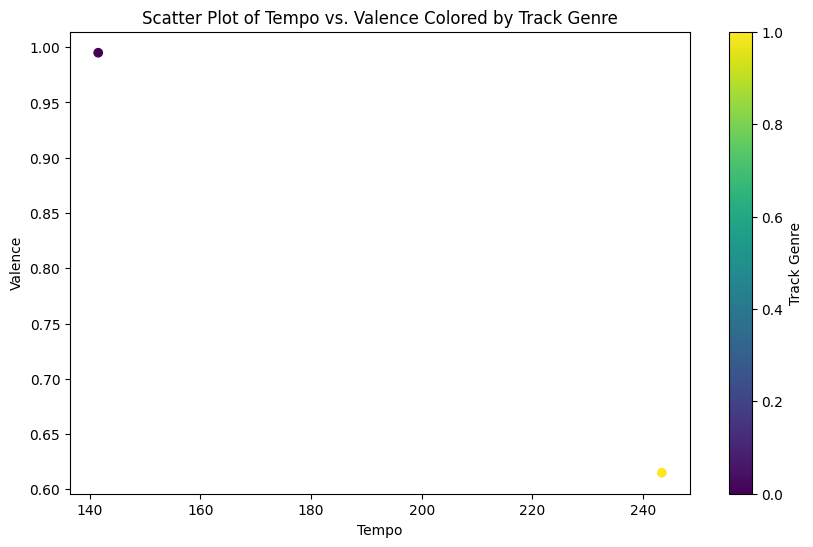

These are the 2 songs with the highest tempo and valence.


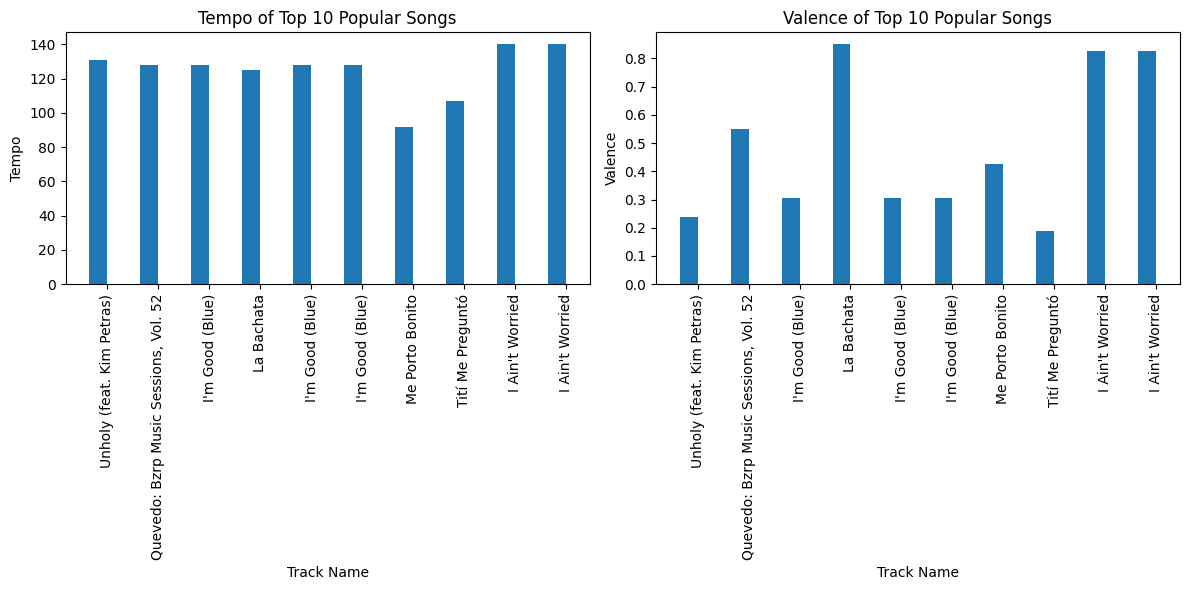

black-metal
                 track_name                track_id           artists  \
16037            Doomswitch  7v9HNMlAe2UBaEhvaCk5wX  Make Them Suffer   
21392         Freezing Moon  4AP3a7eEOlz5sTJiWnv2C6            Mayhem   
6004       Nymphetamine Fix  6WuqJLVZcyJklg7lIozAO8   Cradle Of Filth   
47135             Puritania  0bKs1y9PTFBddM9qj0JGvb      Dimmu Borgir   
61570      Triumph of Death  4nwkxiAVNFMlF360A80vqQ             Vader   
30480               K.I.N.G  6IvxXL0dqXJlgIoIFfMqFA         Satyricon   
24063  Hallowed Be Thy Name  0mJUxFpEI1eAOIIfnNoZ4G   Cradle Of Filth   
18436              Erase Me  0snhTvHSZ5ACrvdcVWeCDS  Make Them Suffer   
13965            Deathcrush  5wWRdIjndDOh1j4OXAPpdD            Mayhem   
6070      The Deathless Sun  0A4Xb4Io50uHnHZ1V8x2KC          Behemoth   

                              album_name  popularity  duration_ms  \
16037                         Doomswitch        58.0     275205.0   
21392          De Mysteriis Dom Sathanas      

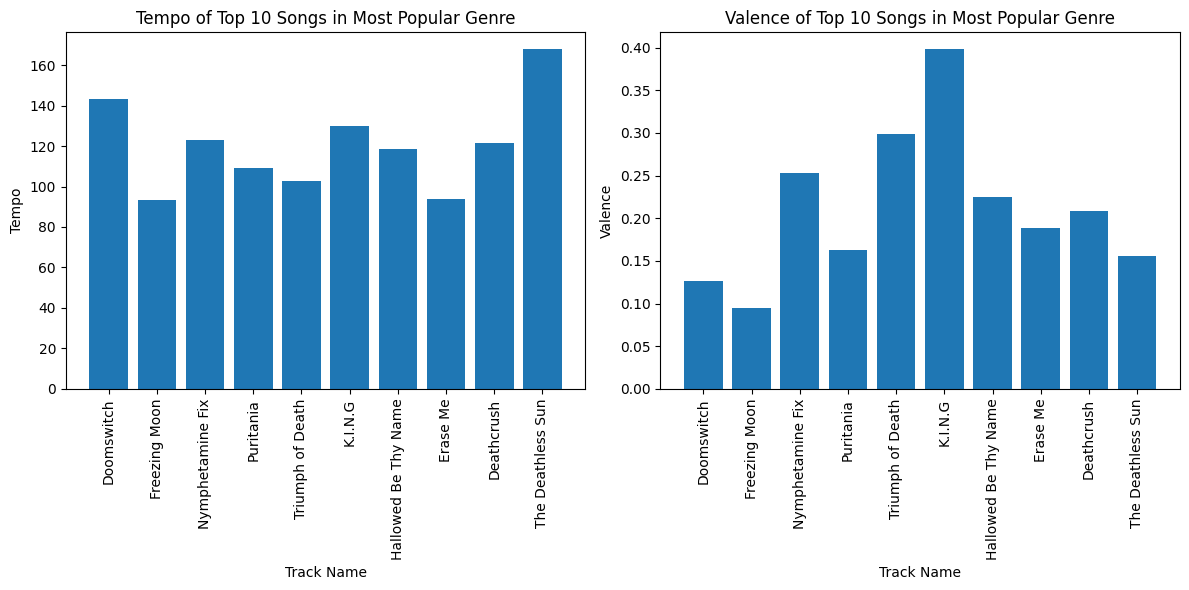

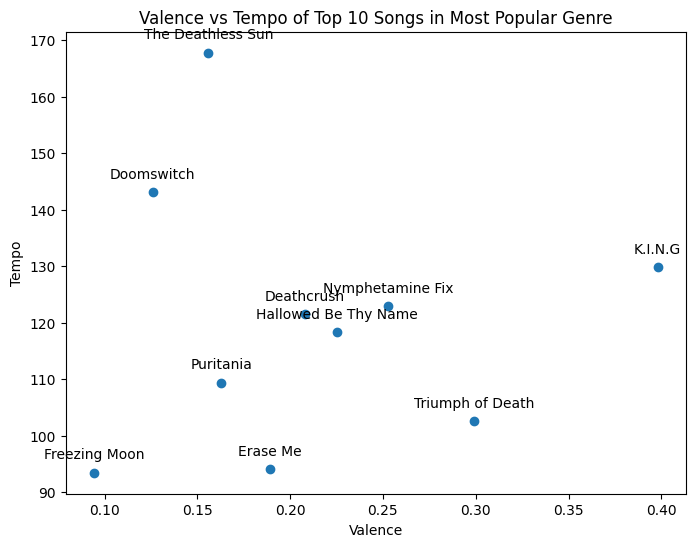

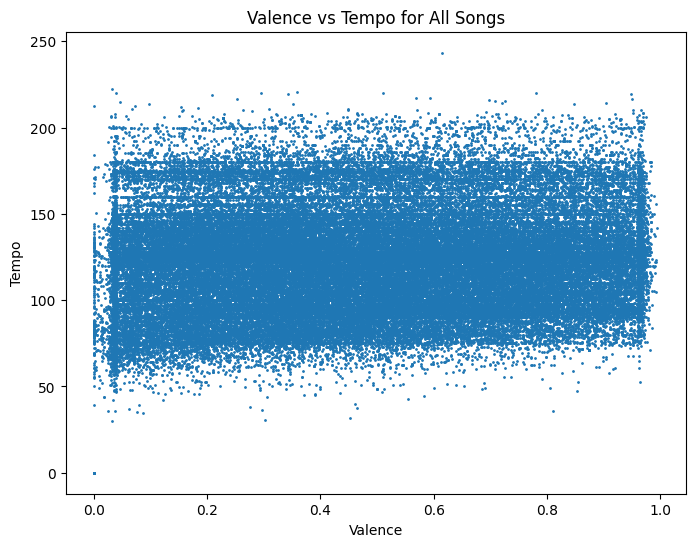

Number of unique genres: 114

Mean popularity by genre:
 track_genre
acoustic       42.483
afrobeat       24.399
alt-rock       33.943
alternative    24.337
ambient        44.191
                ...  
techno         39.042
trance         37.635
trip-hop       34.460
turkish        40.698
world-music    41.873
Name: popularity, Length: 114, dtype: float64

Mean popularity by genre (sorted):
 track_genre
pop-film          59.283
k-pop             56.896
chill             53.651
sad               52.379
grunge            49.594
                   ...  
chicago-house     12.339
detroit-techno    11.174
latin              8.297
romance            3.245
iranian            2.210
Name: popularity, Length: 114, dtype: float64
Number of unique genres: 114

Mean tempo by genre:
 track_genre
acoustic       119.010624
afrobeat       119.213337
alt-rock       124.634404
alternative    122.232394
ambient        111.113129
                  ...    
techno         128.255482
trance         133.276726
t

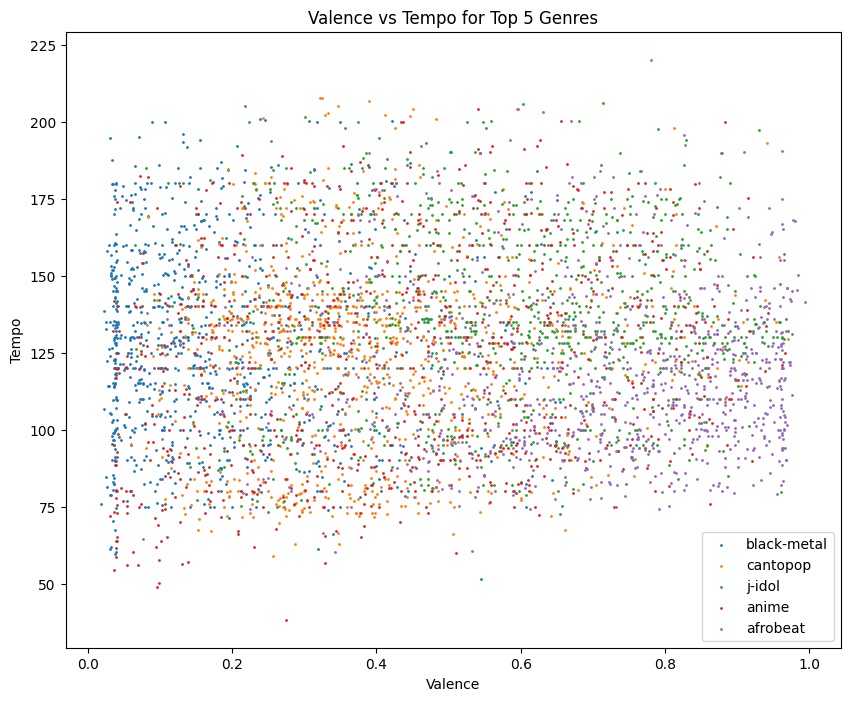

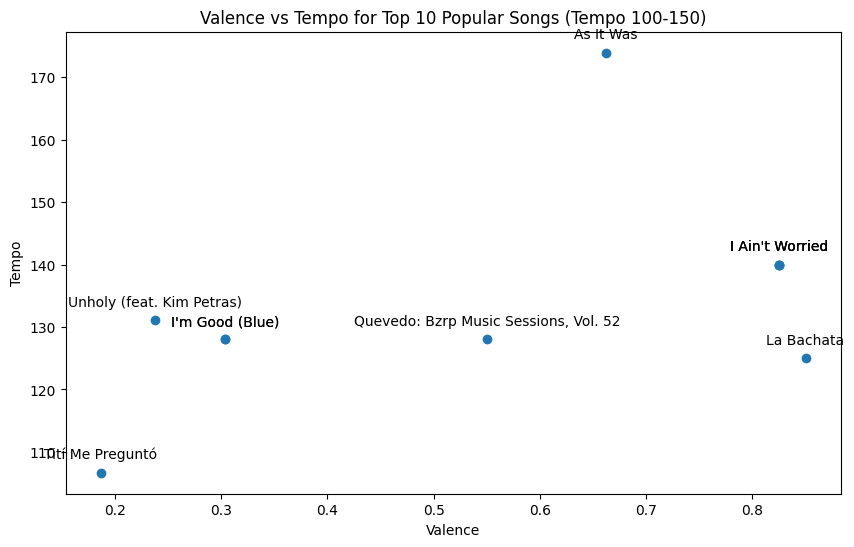

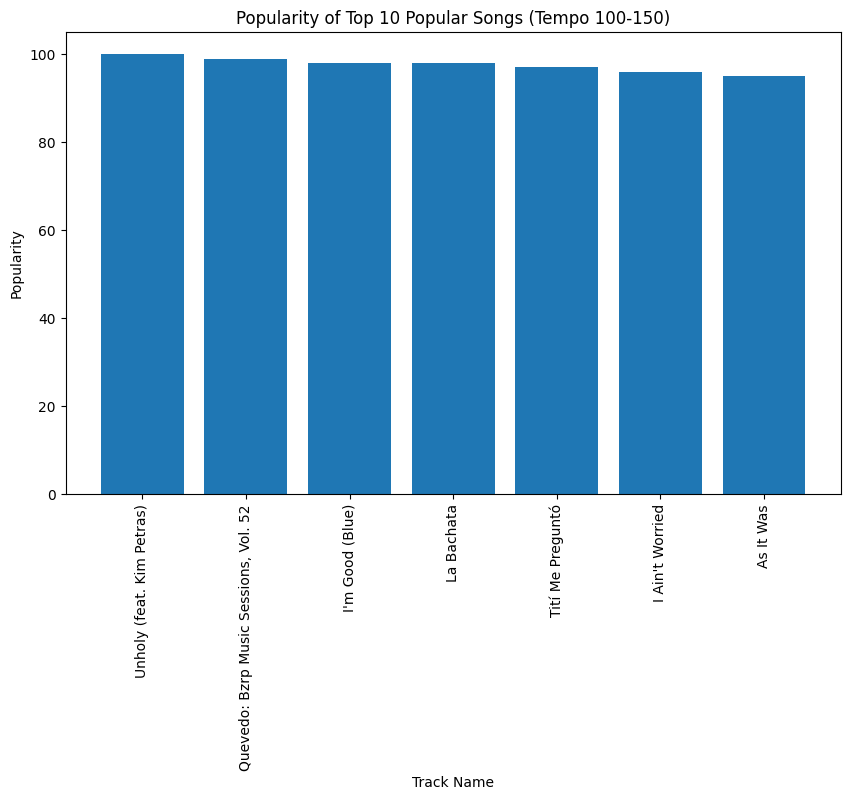

In [ ]:
# Sort by valence and get the top song
top_valence_song = df.sort_values('valence', ascending=False).iloc[0]

# Sort by tempo and get the top song
top_tempo_song = df.sort_values('tempo', ascending=False).iloc[0]

# Create a new DataFrame with the top songs
top_songs_df = pd.DataFrame([top_valence_song, top_tempo_song])

# Sort the new DataFrame by track genre
top_songs_df_sorted = top_songs_df.sort_values('track_genre')

# Display the sorted DataFrame
print("Top Songs by highest tempo and highest valence:")
print(top_songs_df_sorted)

plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Create the scatter plot
plt.scatter(top_songs_df['tempo'], top_songs_df['valence'], c=top_songs_df['track_genre'].astype('category').cat.codes, cmap='viridis')

# Set axis labels and title
plt.xlabel('Tempo')
plt.ylabel('Valence')
plt.title('Scatter Plot of Tempo vs. Valence Colored by Track Genre')

# Add a colorbar to show the mapping of colors to track genres
plt.colorbar(label='Track Genre')

# Show the plot
plt.show()

print("These are the 2 songs with the highest tempo and valence.")

# Sort the dataframe by popularity in descending order
df_sorted1 = final_df.sort_values('popularity', ascending=False)

# Select the top 10 tracks
top_10_tracks = df_sorted1.head(10)

# Adjust bar width and add offset
bar_width = 0.35
offset = np.arange(len(top_10_tracks))

# Create separate charts for tempo and valence with adjusted bar width and offset
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(offset, top_10_tracks['tempo'], bar_width, label='Tempo')
plt.xlabel('Track Name')
plt.ylabel('Tempo')
plt.title('Tempo of Top 10 Popular Songs')
plt.xticks(offset + bar_width / 2, top_10_tracks['track_name'], rotation=90)

plt.subplot(1, 2, 2)
plt.bar(offset, top_10_tracks['valence'], bar_width, label='Valence')
plt.xlabel('Track Name')
plt.ylabel('Valence')
plt.title('Valence of Top 10 Popular Songs')
plt.xticks(offset + bar_width / 2, top_10_tracks['track_name'], rotation=90)

plt.tight_layout()
plt.show()

###############################################

most_popular_genre = final_df['track_genre'].value_counts().idxmax()
print(most_popular_genre)

df_popular_genre = final_df[final_df['track_genre'] == most_popular_genre]

top_10_songs = df_popular_genre.sort_values('popularity', ascending=False).head(10)
print(top_10_songs)

###############################################

# Convert the 'popularity' column to numeric type
final_df['popularity'] = pd.to_numeric(final_df['popularity'])

# Sort the dataframe by popularity in descending order
final_df = final_df.sort_values('popularity', ascending=False).reset_index(drop=True)

print(final_df)

# Save the cleaned dataset
final_df.to_csv('final_clean_dataset.csv', index=False)

###############################################

# Create separate charts for tempo and valence
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(top_10_songs['track_name'], top_10_songs['tempo'])
plt.xlabel('Track Name')
plt.ylabel('Tempo')
plt.title('Tempo of Top 10 Songs in Most Popular Genre')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
plt.bar(top_10_songs['track_name'], top_10_songs['valence'])
plt.xlabel('Track Name')
plt.ylabel('Valence')
plt.title('Valence of Top 10 Songs in Most Popular Genre')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

############################################

plt.figure(figsize=(8, 6))
plt.scatter(top_10_songs['valence'], top_10_songs['tempo'])
plt.xlabel('Valence')
plt.ylabel('Tempo')
plt.title('Valence vs Tempo of Top 10 Songs in Most Popular Genre')

# Annotate each point with the track name
for i, row in top_10_songs.iterrows():
    plt.annotate(row['track_name'], (row['valence'], row['tempo']), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

###################################

plt.figure(figsize=(8, 6))
plt.scatter(final_df['valence'], final_df['tempo'], s=1)  # Reduce point size for better visualization
plt.xlabel('Valence')
plt.ylabel('Tempo')
plt.title('Valence vs Tempo for All Songs')
plt.show()

###################################

# Group the DataFrame by 'track_genre'
genre_groups = df.groupby('track_genre')

# Count the number of unique genres
num_genres = genre_groups['track_genre'].nunique().sum()
print("Number of unique genres:", num_genres)

# Calculate the mean popularity for each genre
mean_popularity = genre_groups['popularity'].mean()
print("\nMean popularity by genre:\n", mean_popularity)

# Sort the mean popularity in descending order
mean_popularity_sorted = mean_popularity.sort_values(ascending=False)

print("\nMean popularity by genre (sorted):\n", mean_popularity_sorted)

#################################

# Group the DataFrame by 'track_genre'
genre_groups = df.groupby('track_genre')

# Count the number of unique genres
num_genres = genre_groups['track_genre'].nunique().sum()
print("Number of unique genres:", num_genres)

# Calculate the mean tempo for each genre
mean_tempo = genre_groups['tempo'].mean()
print("\nMean tempo by genre:\n", mean_tempo)

# Sort the mean tempo in descending order
mean_tempo_sorted = mean_tempo.sort_values(ascending=False)

print("\nMean tempo by genre (sorted):\n", mean_tempo_sorted)

##################################

# Group the DataFrame by 'track_genre'
genre_groups = df.groupby('track_genre')

# Count the number of unique genres
num_genres = genre_groups['track_genre'].nunique().sum()
print("Number of unique genres:", num_genres)

# Calculate the mean valence for each genre
mean_valence = genre_groups['valence'].mean()
print("\nMean valence by genre:\n", mean_tempo)

# Sort the mean valence in descending order
mean_valence_sorted = mean_valence.sort_values(ascending=False)

print("\nMean valence by genre (sorted):\n", mean_valence_sorted)


##############################

top_5_genres = final_df['track_genre'].value_counts().nlargest(5).index.tolist()

df_top_5_genres = final_df[final_df['track_genre'].isin(top_5_genres)]

plt.figure(figsize=(10, 8))

for genre in top_5_genres:
    df_genre = df_top_5_genres[df_top_5_genres['track_genre'] == genre]
    plt.scatter(df_genre['valence'], df_genre['tempo'], s=1, label=genre)

plt.xlabel('Valence')
plt.ylabel('Tempo')
plt.title('Valence vs Tempo for Top 5 Genres')
plt.legend()
plt.show()

################################

df_filtered = final_df[(final_df['tempo'] >= 100) & (df_cleaned['tempo'] <= 150)].sort_values('popularity', ascending=False).head(10)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['valence'], df_filtered['tempo'])
plt.xlabel('Valence')
plt.ylabel('Tempo')
plt.title('Valence vs Tempo for Top 10 Popular Songs (Tempo 100-150)')

# Annotate each point with the track name
for i, row in df_filtered.iterrows():
    plt.annotate(row['track_name'], (row['valence'], row['tempo']), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()
plt.figure(figsize=(10, 6))
plt.bar(df_filtered['track_name'], df_filtered['popularity'])
plt.xlabel('Track Name')
plt.ylabel('Popularity')
plt.title('Popularity of Top 10 Popular Songs (Tempo 100-150)')
plt.xticks(rotation=90)
plt.show()

#################################




**One of the 10 top popular songs is called "I Ain't Worried" having both highest Tempo and highest valence.**

another next one having high Tempo and high Valence is "La Bachata" (a little lower on Tempo but almost the same high Valence).

Note: the "I'm Good (Blue)" song is not duplicate because it has differences in one or more relevant columns (artists, tempo, valence, popularity).




Looking at the results of genres sorted by popularity, tempo and valence (seperately) : "forro" genre appeared at the top 5 genres in tempo and in valence but not in popularity.
As observed before, having a happy or up-bit song, doesn't make the song more popular. but there is a correlation between tempo and valence in a certain range.

The most popular Tempo is between 100-150
the most popular Valence is 0-0.85

raw estimation

The most popular songs are in the Tempo 125-145

Meaning: maybe there is no specific correlation but tempo does affect the popularity.

# 7. **Summary and Conclusions**

There is no correlation between having a happy song and its popularity.
But there is a correlation as explained in the data analysis section, between tempo and valence, meaning we get a happy song in certain values of tempo 125-145 and certain values of valence.

# **Key Insights:**



Data Cleaning: Enhanced data quality by removing missing and unclear values.

Genre Popularity: Identified top genres based on average popularity.

Tempo and Valence: Higher tempo and valence tracks are more popular.

Correlation Analysis: Positive correlations between popularity and both tempo and valence, indicating listeners prefer energetic and positive music.

# **Business Insights:**

Playlist Curation: Focus on popular genres and high-energy tracks.

Marketing: Promote positive, upbeat tracks for wider appeal.

Artist Development: Invest in genres showing rising popularity.

By visualizing and analyzing the data thoroughly, including correlation analysis, the project provides comprehensive and actionable insights for the music industry.